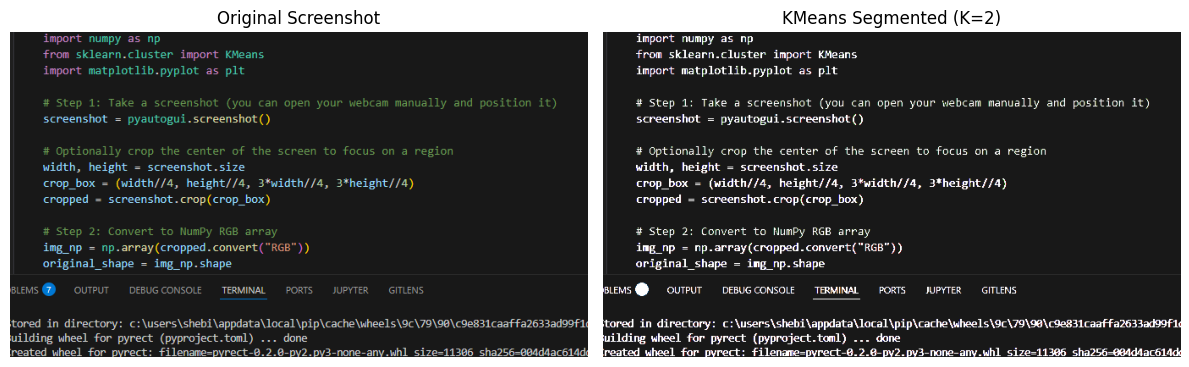

In [3]:
import pyautogui
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Take a screenshot (you can open your webcam manually and position it)
screenshot = pyautogui.screenshot()

# Optionally crop the center of the screen to focus on a region
width, height = screenshot.size
crop_box = (width//4, height//4, 3*width//4, 3*height//4)
cropped = screenshot.crop(crop_box)

# Step 2: Convert to NumPy RGB array
img_np = np.array(cropped.convert("RGB"))
original_shape = img_np.shape

# Step 3: Flatten image to (num_pixels, 3)
pixels = img_np.reshape(-1, 3)

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(pixels)
labels = kmeans.labels_

# Step 5: Mask one cluster (1) to white
mask_color = np.array([255, 255, 255])
segmented_pixels = np.copy(pixels)
segmented_pixels[labels == 1] = mask_color

# Step 6: Reshape and visualize
segmented_image = segmented_pixels.reshape(original_shape)

# Step 7: Display both
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Screenshot")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("KMeans Segmented (K=2)")
plt.axis("off")

plt.tight_layout()
plt.show()
